## # Introduction
<p><img src="https://assets.datacamp.com/production/project_1010/img/book_cover.jpg" alt="The book cover of Peter and Wendy" style="width:183;height:253px;"></p>
<h3 id="flyawaywithpeterpan">Fly away with Peter Pan!</h3>
<p>Peter Pan has been the companion of many children, and went a long way, starting as a Christmas play and ending up as a Disney classic. Did you know that although the play was titled "Peter Pan, Or The Boy Who Wouldn't Grow Up", J. M. Barrie's novel was actually titled "Peter and Wendy"? </p>
<p>You're going to explore and analyze Peter Pan's text to answer the question in the instruction pane below. You are working with the text version available here at <a href="https://www.gutenberg.org/files/16/16-h/16-h.htm">Project Gutenberg</a>. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. <a href="https://www.datacamp.com/courses/intermediate-importing-data-in-python">Intermediate Importing Data in Python</a> and <a href="https://www.datacamp.com/courses/introduction-to-natural-language-processing-in-python">Introduction to Natural Language Processing in Python</a> teach the skills required to complete this project. Should you decide to use them, English stopwords have been downloaded from <code>nltk</code> and are available for you in your environment.</p>

In [13]:
# Use this cell to begin your analysis, and add as many as you would like!
import nltk
import requests
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from collections import Counter

In [14]:
r = requests.get('https://www.gutenberg.org/files/16/16-h/16-h.htm')

In [16]:
r.encoding = 'utf-8'

In [18]:
r.ok

True

In [19]:
html = r.text

In [26]:
html[:100]

'\ufeff<?xml version="1.0" encoding="utf-8"?>\r\n\r\n<!DOCTYPE html\r\n   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//'

In [21]:
soup = BeautifulSoup(html)
text = soup.text

In [22]:
text[:10]

'\ufeff\n\n\n\n\r\n   '

In [27]:
print(text[:100])

﻿




      Peter Pan, by J. M. Barrie
    


    body { margin:5%; background:#faebd0; text-ali


In [28]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)

In [29]:
tokens[:20]

['Peter',
 'Pan',
 'by',
 'J',
 'M',
 'Barrie',
 'body',
 'margin',
 '5',
 'background',
 'faebd0',
 'text',
 'align',
 'justify',
 'P',
 'text',
 'indent',
 '1em',
 'margin',
 'top']

In [39]:
ls nltk_data/corpora/stopwords

arabic	     english  greek	  kazakh      README	spanish
azerbaijani  finnish  hungarian   nepali      romanian	swedish
danish	     french   indonesian  norwegian   russian	tajik
dutch	     german   italian	  portuguese  slovene	turkish


In [41]:
stopwords = stopwords.words(fileids='english')

In [51]:
tokens_text = [t.lower() for t in tokens if t.lower() not in stopwords]

In [52]:
counter = Counter(tokens_text)

In [56]:
top_ten = counter.most_common(10)
top_ten

[('peter', 410),
 ('wendy', 362),
 ('said', 358),
 ('would', 219),
 ('one', 214),
 ('hook', 175),
 ('could', 142),
 ('cried', 136),
 ('john', 133),
 ('time', 126)]

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [57]:
df = pd.DataFrame(top_ten, columns=['words', 'occurences'])

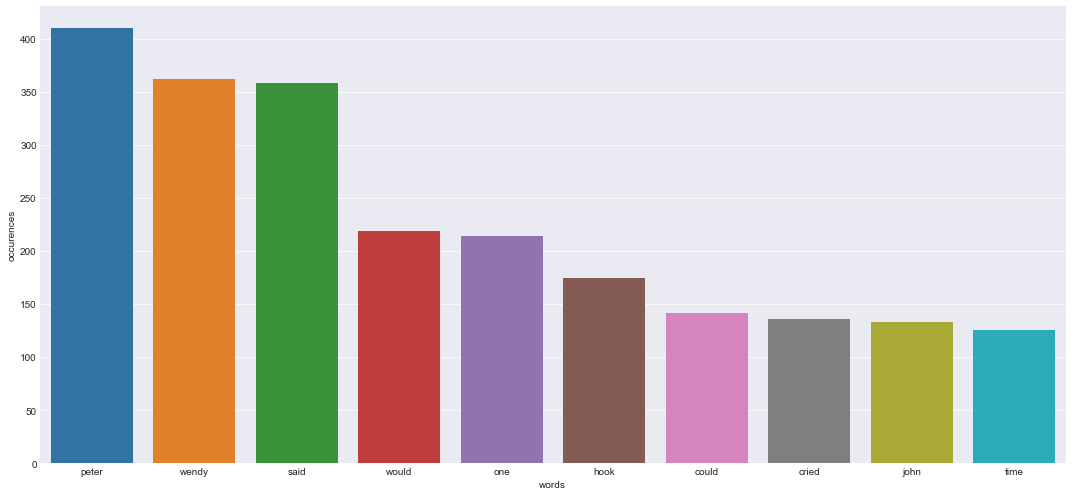

In [61]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.barplot(x='words', y='occurences',data=df)

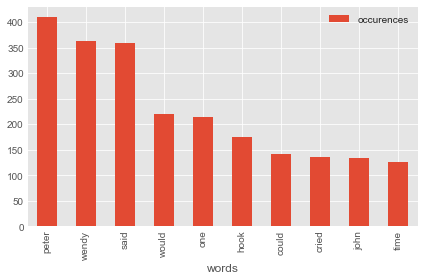

In [71]:
plt.style.use('ggplot')
df.plot.bar(x='words', y='occurences')